In [1]:
# !pip install category-encoders

In [2]:
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder

Carregando o dataset

In [3]:
link = 'C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/Financial-Data.csv'

dfMerge = pd.read_csv(link)
dfMerge

Entry_id  age  pay_schedule  home_owner  income  months_employed  \
0       7629673   40     bi-weekly           1    3135                0   
1       3560428   61        weekly           0    3180                0   
2       6934997   23        weekly           0    1540                6   
3       5682812   40     bi-weekly           0    5230                0   
4       5335819   33  semi-monthly           0    3590                0   
...         ...  ...           ...         ...     ...              ...   
17903   9949728   31       monthly           0    3245                0   
17904   9442442   46     bi-weekly           0    6525                0   
17905   9857590   46        weekly           0    2685                0   
17906   8708471   42     bi-weekly           0    2515                0   
17907   1498559   29        weekly           1    2665                0   

       years_employed  current_address_year  personal_account_m  \
0                   3                     3                   6   
1                   6                     3                   2   
2                   0                     0                   7   
3                   6                     1                   2   
4                   5                     2                   2   
...               ...                   ...                 ...   
17903               5                     3                   2   
17904               2                     1                   3   
17905               5                     1                   1   
17906               3                     5                   6   
17907               4                    10                   4   

       personal_account_y  ...  amount_requested  risk_score  risk_score_2  \
0                       2  ...               550       36200      0.737398   
1                       7  ...               600       30150      0.738510   
2                       1  ...               450       34550      0.642993   
3                       7  ...               700       42150      0.665224   
4                       8  ...              1100       53850      0.617361   
...                   ...  ...               ...         ...           ...   
17903                   6  ...               700       71700      0.691126   
17904                   3  ...               800       51800      0.648525   
17905                   8  ...              1200       59650      0.677975   
17906                   1  ...               400       80200      0.642741   
17907                   1  ...               600       64950      0.720889   

       risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0          0.903517      0.487712      0.515977           0.580918   
1          0.881027      0.713423      0.826402           0.730720   
2          0.766554      0.595018      0.762284           0.531712   
3          0.960832      0.767828      0.778831           0.792552   
4          0.857560      0.613487      0.665523           0.744634   
...             ...           ...           ...                ...   
17903      0.928196      0.664112      0.838012           0.727705   
17904      0.970832      0.699241      0.844724           0.774918   
17905      0.918141      0.687981      0.939101           0.472045   
17906      0.885684      0.456448      0.686823           0.406568   
17907      0.874372      0.505565      0.631619           0.846163   

       ext_quality_score_2  inquiries_last_month  e_signed  
0                 0.380918                    10         1  
1                 0.630720                     9         0  
2                 0.531712                     7         0  
3                 0.592552                     8         1  
4                 0.744634                    12         0  
...                    ...                   ...       ...  
17903             0.627705                     2         0  
17904             0.474918         

Eliminação de colunas com valores de correlação muito próximos a zero.

Será buscado o valor absoluto das correlações usando o 'e-signed' como referência.

In [4]:
dfMergeModule = abs(dfMerge.corr()[['e_signed']])

dfMergeModuleSorted = dfMergeModule.sort_values(['e_signed'])['e_signed']
dfMergeModuleSorted < 0.01

C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_17256\2608482270.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfMergeModule = abs(dfMerge.corr()[['e_signed']])


Entry_id                 True
years_employed           True
risk_score_4             True
risk_score_5             True
months_employed         False
risk_score_2            False
current_address_year    False
personal_account_y      False
ext_quality_score_2     False
inquiries_last_month    False
income                  False
ext_quality_score       False
risk_score_3            False
has_debt                False
home_owner              False
amount_requested        False
personal_account_m      False
risk_score              False
age                     False
e_signed                False
Name: e_signed, dtype: bool

As colunas que retornaram 'True' serão dropadas.

In [5]:
dfMerge = dfMerge.drop([
    'risk_score_5', 'Entry_id', 
    'years_employed', 'risk_score_4'
], axis=1)

dfMerge

age  pay_schedule  home_owner  income  months_employed  \
0       40     bi-weekly           1    3135                0   
1       61        weekly           0    3180                0   
2       23        weekly           0    1540                6   
3       40     bi-weekly           0    5230                0   
4       33  semi-monthly           0    3590                0   
...    ...           ...         ...     ...              ...   
17903   31       monthly           0    3245                0   
17904   46     bi-weekly           0    6525                0   
17905   46        weekly           0    2685                0   
17906   42     bi-weekly           0    2515                0   
17907   29        weekly           1    2665                0   

       current_address_year  personal_account_m  personal_account_y  has_debt  \
0                         3                   6                   2         1   
1                         3                   2                   7         1   
2                         0                   7                   1         1   
3                         1                   2                   7         1   
4                         2                   2                   8         1   
...                     ...                 ...                 ...       ...   
17903                     3                   2                   6         1   
17904                     1                   3                   3         1   
17905                     1                   1                   8         1   
17906                     5                   6                   1         1   
17907                    10                   4                   1         1   

       amount_requested  risk_score  risk_score_2  risk_score_3  \
0                   550       36200      0.737398      0.903517   
1                   600       30150      0.738510      0.881027   
2                   450       34550      0.642993      0.766554   
3                   700       42150      0.665224      0.960832   
4                  1100       53850      0.617361      0.857560   
...                 ...         ...           ...           ...   
17903               700       71700      0.691126      0.928196   
17904               800       51800      0.648525      0.970832   
17905              1200       59650      0.677975      0.918141   
17906               400       80200      0.642741      0.885684   
17907               600       64950      0.720889      0.874372   

       ext_quality_score  ext_quality_score_2  inquiries_last_month  e_signed  
0               0.580918             0.380918                    10         1  
1               0.730720             0.630720                     9         0  
2               0.531712             0.531712                     7         0  
3               0.792552             0.592552                     8         1  
4               0.744634             0.744634                    12         0  
...                  ...                  ...                   ...       ...  
17903           0.727705             0.627705                     2         0  
17904           0.774918             0.474918                     3         0  
17905           0.472045             0.672045                     9         0  
17906           0.406568             0.406568                     3         1  
17907           0.846163             0.846163                     4         1  

[17908 rows x 17 columns]

Como aa coluna 'pay_schedule' apresenta valores em string:

 [ 'bi-weekly' | 'weekly' | 'semi-monthly' | 'monthly' ]


 Será feito o uso da codificação OneHot(fictícia) para recursos categóricos produz um recurso por categoria, cada binário. (Fonte: https://contrib.scikit-learn.org/category_encoders/onehot.html).


---

Dessa forma, teremos 4 colunas binárias de 'pay_schedule'

In [6]:
one = OneHotEncoder(cols=['pay_schedule']).fit_transform(dfMerge['pay_schedule'])

dfMerge = pd.concat([one, dfMerge.drop(['pay_schedule'], axis=1)], axis=1)
dfMerge

pay_schedule_1  pay_schedule_2  pay_schedule_3  pay_schedule_4  age  \
0                   1               0               0               0   40   
1                   0               1               0               0   61   
2                   0               1               0               0   23   
3                   1               0               0               0   40   
4                   0               0               1               0   33   
...               ...             ...             ...             ...  ...   
17903               0               0               0               1   31   
17904               1               0               0               0   46   
17905               0               1               0               0   46   
17906               1               0               0               0   42   
17907               0               1               0               0   29   

       home_owner  income  months_employed  current_address_year  \
0               1    3135                0                     3   
1               0    3180                0                     3   
2               0    1540                6                     0   
3               0    5230                0                     1   
4               0    3590                0                     2   
...           ...     ...              ...                   ...   
17903           0    3245                0                     3   
17904           0    6525                0                     1   
17905           0    2685                0                     1   
17906           0    2515                0                     5   
17907           1    2665                0                    10   

       personal_account_m  personal_account_y  has_debt  amount_requested  \
0                       6                   2         1               550   
1                       2                   7         1               600   
2                       7                   1         1               450   
3                       2                   7         1               700   
4                       2                   8         1              1100   
...                   ...                 ...       ...               ...   
17903                   2                   6         1               700   
17904                   3                   3         1               800   
17905                   1                   8         1              1200   
17906                   6                   1         1               400   
17907                   4                   1         1               600   

       risk_score  risk_score_2  risk_score_3  ext_quality_score  \
0           36200      0.737398      0.903517           0.580918   
1           30150      0.738510      0.881027           0.730720   
2           34550      0.642993      0.766554           0.531712   
3           42150      0.665224      0.960832           0.792552   
4           53850      0.617361      0.857560           0.744634   
...           ...           ...           ...                ...   
17903       71700      0.691126      0.928196           0.727705   
17904       51800      0.648525      0.970832           0.774918   
17905       59650      0.677975      0.918141           0.472045   
17906       80200      0.642741      0.885684           0.406568   
17907       64950      0.720889      0.874372           0.846163   

       ext_quality_score_2  inquiries_last_month  e_signed  
0                 0.380918                    10         1  
1                 0.630720                     9         0  
2                 0.531712                     7         0  
3                 0.592552                     8         1  
4                 0.744634                    12         0  
...                    ...                   ...       ...  
17903             0.627705                     2         0  
17904             0.474

Em relação as colunas do tipo 'personal_account' existem 2 versões: mês e ano. Portanto, é possível juntar ambas colunas em uma só ao multiplicar a do ano por 12 e somar com a do mês.

Depois de criada a nova coluna com o resultado dessa operação, só falta apagar as colunas antigas.

In [7]:
dfMerge["personal_accounts_month"] = dfMerge["personal_account_y"] * 12 + dfMerge["personal_account_m"]

dfMerge = dfMerge.drop(["personal_account_y", "personal_account_m"], axis=1)

dfMerge

pay_schedule_1  pay_schedule_2  pay_schedule_3  pay_schedule_4  age  \
0                   1               0               0               0   40   
1                   0               1               0               0   61   
2                   0               1               0               0   23   
3                   1               0               0               0   40   
4                   0               0               1               0   33   
...               ...             ...             ...             ...  ...   
17903               0               0               0               1   31   
17904               1               0               0               0   46   
17905               0               1               0               0   46   
17906               1               0               0               0   42   
17907               0               1               0               0   29   

       home_owner  income  months_employed  current_address_year  has_debt  \
0               1    3135                0                     3         1   
1               0    3180                0                     3         1   
2               0    1540                6                     0         1   
3               0    5230                0                     1         1   
4               0    3590                0                     2         1   
...           ...     ...              ...                   ...       ...   
17903           0    3245                0                     3         1   
17904           0    6525                0                     1         1   
17905           0    2685                0                     1         1   
17906           0    2515                0                     5         1   
17907           1    2665                0                    10         1   

       amount_requested  risk_score  risk_score_2  risk_score_3  \
0                   550       36200      0.737398      0.903517   
1                   600       30150      0.738510      0.881027   
2                   450       34550      0.642993      0.766554   
3                   700       42150      0.665224      0.960832   
4                  1100       53850      0.617361      0.857560   
...                 ...         ...           ...           ...   
17903               700       71700      0.691126      0.928196   
17904               800       51800      0.648525      0.970832   
17905              1200       59650      0.677975      0.918141   
17906               400       80200      0.642741      0.885684   
17907               600       64950      0.720889      0.874372   

       ext_quality_score  ext_quality_score_2  inquiries_last_month  e_signed  \
0               0.580918             0.380918                    10         1   
1               0.730720             0.630720                     9         0   
2               0.531712             0.531712                     7         0   
3               0.792552             0.592552                     8         1   
4               0.744634             0.744634                    12         0   
...                  ...                  ...                   ...       ...   
17903           0.727705             0.627705                     2         0   
17904           0.774918             0.474918                     3         0   
17905           0.472045             0.672045                     9         0   
17906           0.406568             0.406568                     3         1   
17907           0.846163             0.846163                     4         1   

       personal_accounts_month  
0                           30  
1                           86  
2                           19  
3                           86  
4                           98  
...                        ...  
17903                       74  
17904                       39  
17905                       97  
17906                    

A fim de reduzir a variação do 'risk_score' foi realizado uma operação buscando o logaritmo de base 2 dos valores dessa coluna e transformando no valor aproximado com 4 casas decimais.

In [8]:
dfMerge['risk_score'] = round(np.log2(dfMerge['risk_score']), 4)
dfMerge

pay_schedule_1  pay_schedule_2  pay_schedule_3  pay_schedule_4  age  \
0                   1               0               0               0   40   
1                   0               1               0               0   61   
2                   0               1               0               0   23   
3                   1               0               0               0   40   
4                   0               0               1               0   33   
...               ...             ...             ...             ...  ...   
17903               0               0               0               1   31   
17904               1               0               0               0   46   
17905               0               1               0               0   46   
17906               1               0               0               0   42   
17907               0               1               0               0   29   

       home_owner  income  months_employed  current_address_year  has_debt  \
0               1    3135                0                     3         1   
1               0    3180                0                     3         1   
2               0    1540                6                     0         1   
3               0    5230                0                     1         1   
4               0    3590                0                     2         1   
...           ...     ...              ...                   ...       ...   
17903           0    3245                0                     3         1   
17904           0    6525                0                     1         1   
17905           0    2685                0                     1         1   
17906           0    2515                0                     5         1   
17907           1    2665                0                    10         1   

       amount_requested  risk_score  risk_score_2  risk_score_3  \
0                   550     15.1437      0.737398      0.903517   
1                   600     14.8799      0.738510      0.881027   
2                   450     15.0764      0.642993      0.766554   
3                   700     15.3632      0.665224      0.960832   
4                  1100     15.7167      0.617361      0.857560   
...                 ...         ...           ...           ...   
17903               700     16.1297      0.691126      0.928196   
17904               800     15.6607      0.648525      0.970832   
17905              1200     15.8642      0.677975      0.918141   
17906               400     16.2913      0.642741      0.885684   
17907               600     15.9870      0.720889      0.874372   

       ext_quality_score  ext_quality_score_2  inquiries_last_month  e_signed  \
0               0.580918             0.380918                    10         1   
1               0.730720             0.630720                     9         0   
2               0.531712             0.531712                     7         0   
3               0.792552             0.592552                     8         1   
4               0.744634             0.744634                    12         0   
...                  ...                  ...                   ...       ...   
17903           0.727705             0.627705                     2         0   
17904           0.774918             0.474918                     3         0   
17905           0.472045             0.672045                     9         0   
17906           0.406568             0.406568                     3         1   
17907           0.846163             0.846163                     4         1   

       personal_accounts_month  
0                           30  
1                           86  
2                           19  
3                           86  
4                           98  
...                        ...  
17903                       74  
17904                       39  
17905                       97  
17906                    

Adaptando algumas colunas para reduzir proporcionalmente seus valores:

income / 100

amount_request / 10

In [9]:
dfMerge['income'] = dfMerge['income'] / 100
dfMerge['amount_requested'] = dfMerge['amount_requested'] / 10

Após a análise, verificou-se que os meses empregado e a idade não teriam tanta relevância, portanto foram dropados.

In [10]:
dfMerge = dfMerge.drop(['months_employed', 'age'], axis=1)
dfMerge

pay_schedule_1  pay_schedule_2  pay_schedule_3  pay_schedule_4  \
0                   1               0               0               0   
1                   0               1               0               0   
2                   0               1               0               0   
3                   1               0               0               0   
4                   0               0               1               0   
...               ...             ...             ...             ...   
17903               0               0               0               1   
17904               1               0               0               0   
17905               0               1               0               0   
17906               1               0               0               0   
17907               0               1               0               0   

       home_owner  income  current_address_year  has_debt  amount_requested  \
0               1   31.35                     3         1              55.0   
1               0   31.80                     3         1              60.0   
2               0   15.40                     0         1              45.0   
3               0   52.30                     1         1              70.0   
4               0   35.90                     2         1             110.0   
...           ...     ...                   ...       ...               ...   
17903           0   32.45                     3         1              70.0   
17904           0   65.25                     1         1              80.0   
17905           0   26.85                     1         1             120.0   
17906           0   25.15                     5         1              40.0   
17907           1   26.65                    10         1              60.0   

       risk_score  risk_score_2  risk_score_3  ext_quality_score  \
0         15.1437      0.737398      0.903517           0.580918   
1         14.8799      0.738510      0.881027           0.730720   
2         15.0764      0.642993      0.766554           0.531712   
3         15.3632      0.665224      0.960832           0.792552   
4         15.7167      0.617361      0.857560           0.744634   
...           ...           ...           ...                ...   
17903     16.1297      0.691126      0.928196           0.727705   
17904     15.6607      0.648525      0.970832           0.774918   
17905     15.8642      0.677975      0.918141           0.472045   
17906     16.2913      0.642741      0.885684           0.406568   
17907     15.9870      0.720889      0.874372           0.846163   

       ext_quality_score_2  inquiries_last_month  e_signed  \
0                 0.380918                    10         1   
1                 0.630720                     9         0   
2                 0.531712                     7         0   
3                 0.592552                     8         1   
4                 0.744634                    12         0   
...                    ...                   ...       ...   
17903             0.627705                     2         0   
17904             0.474918                     3         0   
17905             0.672045                     9         0   
17906             0.406568                     3         1   
17907             0.846163                     4         1   

       personal_accounts_month  
0                           30  
1                           86  
2                           19  
3                           86  
4                           98  
...                        ...  
17903                       74  
17904                       39  
17905                       97  
17906                       18  
17907                       16  

[17908 rows x 17 columns]

Para aproximar-se aos valores do 'risk_score' foram feitas adaptações nas colunas:

'risk_score_2' | 'risk_score_3' | 'ext_quality_score' | 'ext_quality_score_2'

In [11]:
dfMerge['risk_score_2'] = dfMerge['risk_score_2'] * 10
dfMerge['risk_score_3'] = dfMerge['risk_score_3'] * 10

dfMerge['ext_quality_score'] = dfMerge['ext_quality_score'] * 10
dfMerge['ext_quality_score_2'] = dfMerge['ext_quality_score_2'] * 10

dfMerge

pay_schedule_1  pay_schedule_2  pay_schedule_3  pay_schedule_4  \
0                   1               0               0               0   
1                   0               1               0               0   
2                   0               1               0               0   
3                   1               0               0               0   
4                   0               0               1               0   
...               ...             ...             ...             ...   
17903               0               0               0               1   
17904               1               0               0               0   
17905               0               1               0               0   
17906               1               0               0               0   
17907               0               1               0               0   

       home_owner  income  current_address_year  has_debt  amount_requested  \
0               1   31.35                     3         1              55.0   
1               0   31.80                     3         1              60.0   
2               0   15.40                     0         1              45.0   
3               0   52.30                     1         1              70.0   
4               0   35.90                     2         1             110.0   
...           ...     ...                   ...       ...               ...   
17903           0   32.45                     3         1              70.0   
17904           0   65.25                     1         1              80.0   
17905           0   26.85                     1         1             120.0   
17906           0   25.15                     5         1              40.0   
17907           1   26.65                    10         1              60.0   

       risk_score  risk_score_2  risk_score_3  ext_quality_score  \
0         15.1437      7.373983      9.035172            5.80918   
1         14.8799      7.385101      8.810267            7.30720   
2         15.0764      6.429933      7.665537            5.31712   
3         15.3632      6.652235      9.608323            7.92552   
4         15.7167      6.173613      8.575597            7.44634   
...           ...           ...           ...                ...   
17903     16.1297      6.911261      9.281963            7.27705   
17904     15.6607      6.485252      9.708318            7.74918   
17905     15.8642      6.779748      9.181406            4.72045   
17906     16.2913      6.427412      8.856841            4.06568   
17907     15.9870      7.208891      8.743715            8.46163   

       ext_quality_score_2  inquiries_last_month  e_signed  \
0                  3.80918                    10         1   
1                  6.30720                     9         0   
2                  5.31712                     7         0   
3                  5.92552                     8         1   
4                  7.44634                    12         0   
...                    ...                   ...       ...   
17903              6.27705                     2         0   
17904              4.74918                     3         0   
17905              6.72045                     9         0   
17906              4.06568                     3         1   
17907              8.46163                     4         1   

       personal_accounts_month  
0                           30  
1                           86  
2                           19  
3                           86  
4                           98  
...                        ...  
17903                       74  
17904                       39  
17905                       97  
17906                       18  
17907                       16  

[17908 rows x 17 columns]

## Bem, vamos aplicar o PCA em cima do dataset tratado anteriormente:

Em primeiro lugar vamos separar nosso dfMerge em data e target:

In [12]:
data = dfMerge.drop("e_signed", axis=1)
target = dfMerge['e_signed']

Vamos analisar o PCA aplicado em sua totalidade:

In [13]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA()
components = pca.fit_transform(data)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [14]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(16),
    color=dfMerge["e_signed"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Conforme observado, 2 dimensões já alcança uma boa representatividade (86.4 + 9.5 = 95.9%).

Portanto iremos usar essas 2 dimensões.

In [15]:
pca = PCA(n_components=2)
components = pca.fit_transform(data)

total_var = pca.explained_variance_ratio_.sum() * 100
print('Total da variância capturada: ', total_var)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

Total da variância capturada:  95.8819767603152


### Visualizando nosso dataset via Plotly

In [16]:


fig = px.scatter_matrix(
    components,
    labels=labels,
    color=dfMerge["e_signed"]
)

fig.show()

## Trabalhando com a solução proposta:

In [17]:
import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import os, math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix

Separando o dataset em treino e teste

In [18]:
def create_data(dfMerge):
    X = np.array(components)
    y = np.asarray(dfMerge['e_signed']).astype('int64')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
    test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
    
    return train_ds, test_ds


train_ds, test_ds = create_data(dfMerge)

Criação da função de ativação e classes para a elaboração da rede neural.

In [19]:
def GELU(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
    return res


class ResMLPBlock(tf.keras.layers.Layer):
    def __init__(self, units, residual_path):
        super(ResMLPBlock, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation='relu')
        self.D2 = Dense(units, activation='relu')

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GELU(residual)
            residual = self.D4(residual)
            residual = GELU(residual)

        output = y + residual
        return output


class ResMLP(tf.keras.Model):
    def __init__(self, initial_filters, block_list, num_classes):
        super(ResMLP, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='relu')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=True)
                else:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2
        self.D2 = Dense(num_classes, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

Compilação e treinamento da rede neural.

Em comparação ao original, foi alterado o 'initial_filters' anteriormente 32 virou 40; o 'optimizer' anteriormente 'adam' e virou 'rmsprop'; o número de épocas (10 -> 20) e o 'batch_size' anteriormente 32 virou 40.

In [20]:
net = ResMLP(initial_filters=40, block_list=[2, 2, 2], num_classes=2)

net.compile(optimizer='rmsprop',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['sparse_categorical_accuracy'])

history = net.fit(train_ds, epochs=20, batch_size=40, validation_data=test_ds)

net.summary()

Epoch 1/20
420/420 [==============================] - 7s 6ms/step - loss: 0.6837 - sparse_categorical_accuracy: 0.5404 - val_loss: 0.6934 - val_sparse_categorical_accuracy: 0.5064
Epoch 2/20
420/420 [==============================] - 2s 4ms/step - loss: 0.6745 - sparse_categorical_accuracy: 0.5454 - val_loss: 0.6760 - val_sparse_categorical_accuracy: 0.5475
Epoch 3/20
420/420 [==============================] - 2s 4ms/step - loss: 0.6726 - sparse_categorical_accuracy: 0.5487 - val_loss: 0.6740 - val_sparse_categorical_accuracy: 0.5546
Epoch 4/20
420/420 [==============================] - 2s 4ms/step - loss: 0.6711 - sparse_categorical_accuracy: 0.5538 - val_loss: 0.6729 - val_sparse_categorical_accuracy: 0.5582
Epoch 5/20
420/420 [==============================] - 2s 4ms/step - loss: 0.6704 - sparse_categorical_accuracy: 0.5538 - val_loss: 0.6717 - val_sparse_categorical_accuracy: 0.5571
Epoch 6/20
420/420 [==============================] - 2s 4ms/step - loss: 0.6700 - sparse_categorica

Verificação da perda e acurácia no treino e validação.

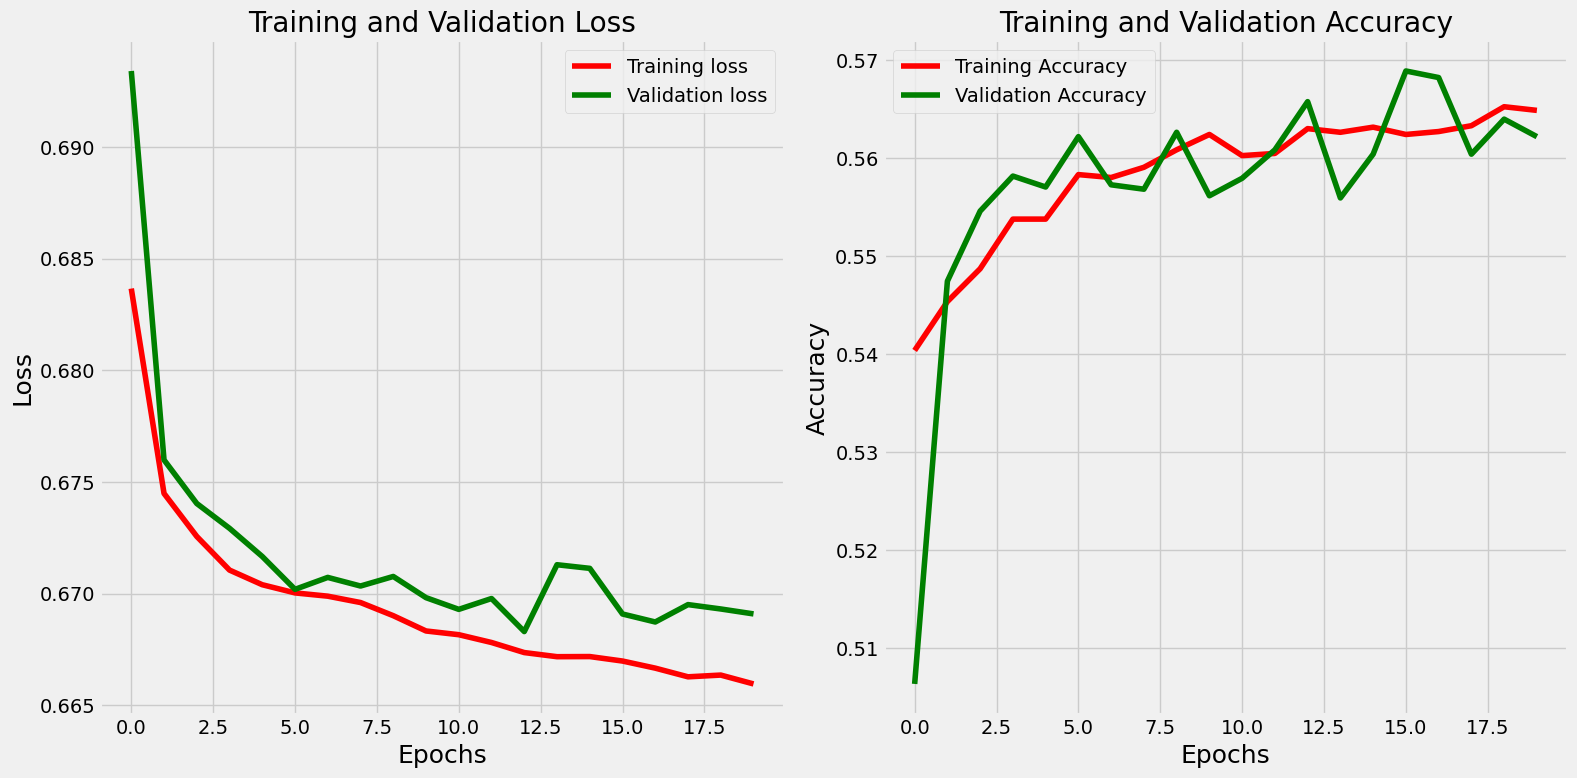

In [21]:
def plot_auc_acc_loss(history, epochs):
    tacc = history.history['sparse_categorical_accuracy']
    tloss = history.history['loss']

    vacc = history.history['val_sparse_categorical_accuracy']
    vloss = history.history['val_loss']

    Epochs = [i for i in range(epochs)]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_acc_loss(history, epochs=20)

Uso das métricas para avaliar o desempenho.

1/1 [==============================] - 0s 274ms/step
there were 1960 errors in 4477 tests for an accuracy of  56.22%


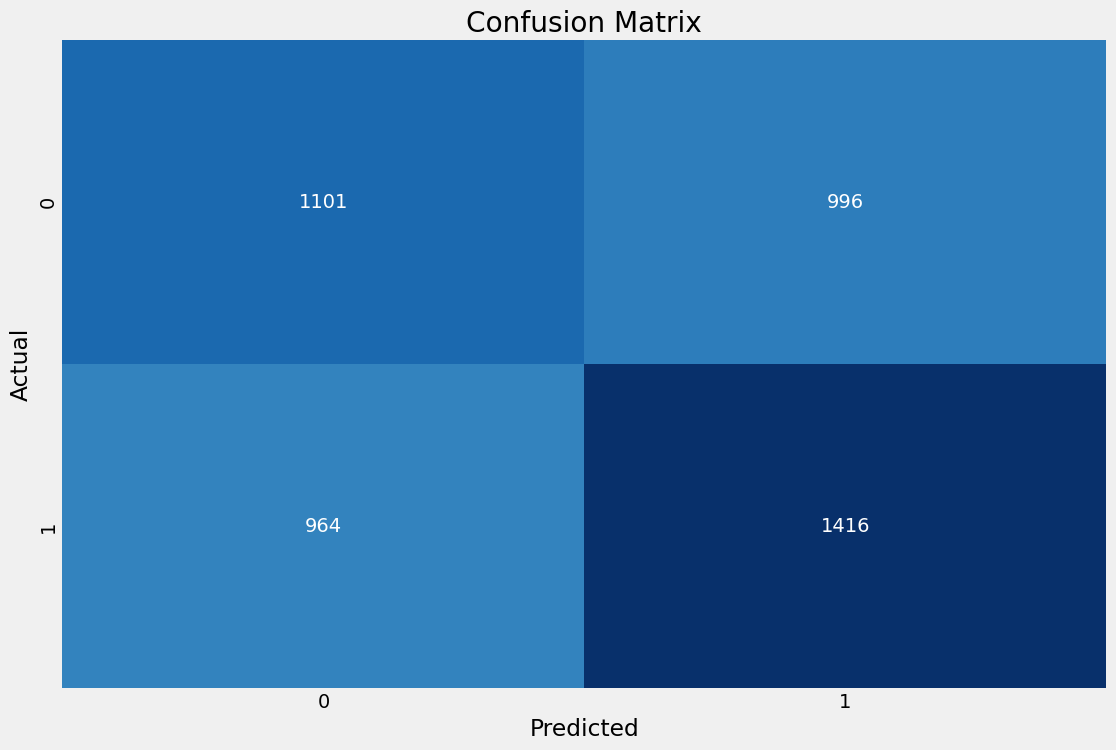

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.5332    0.5250    0.5291      2097
           1     0.5871    0.5950    0.5910      2380

    accuracy                         0.5622      4477
   macro avg     0.5601    0.5600    0.5600      4477
weighted avg     0.5618    0.5622    0.5620      4477



In [22]:
def predictor(test_ds):
    y_pred = []
    y_true = []
    errors = 0
    for X_test, y_test in test_ds:
        pred = tf.argmax(net.predict(X_test), axis=1)
        for i in range(len(pred)):
            pred_index = pred[i]
            true_index = y_test[i]
            if pred_index != true_index:
                errors += 1
            y_pred.append(pred_index)
            y_true.append(true_index)
            
    acc = (1 - errors / len(y_true)) * 100
    msg = f'there were {errors} errors in {len(y_true)} tests for an accuracy of {acc:6.2f}%'
    print(msg)
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100

    if len(set(ytrue)) <= 30:
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    clr = classification_report(y_true, y_pred, digits=4)
    print("Classification Report:\n----------------------\n", clr)

    return errors, f1score

errors, f1score = predictor(test_ds)

Verificou-se que não houve grandes mudanças em relação ao original apesar da mudança no dataset (com o uso do PCA) e a mudança de alguns parametros.

Verificando pelo f1-score temos os seguintes resultados:

Original   - f1-score = 0.5676

Modificado - f1-score = 0.5754